# Exploratory Data Analysis (EDA) on the Xente Dataset

## 1. Load Data

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/data.csv')

## 2. Show Data Structure

In [23]:
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataset has 95662 rows and 16 columns.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## 3. Summary Statistics

In [25]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## 4. Numerical Feature Distributions

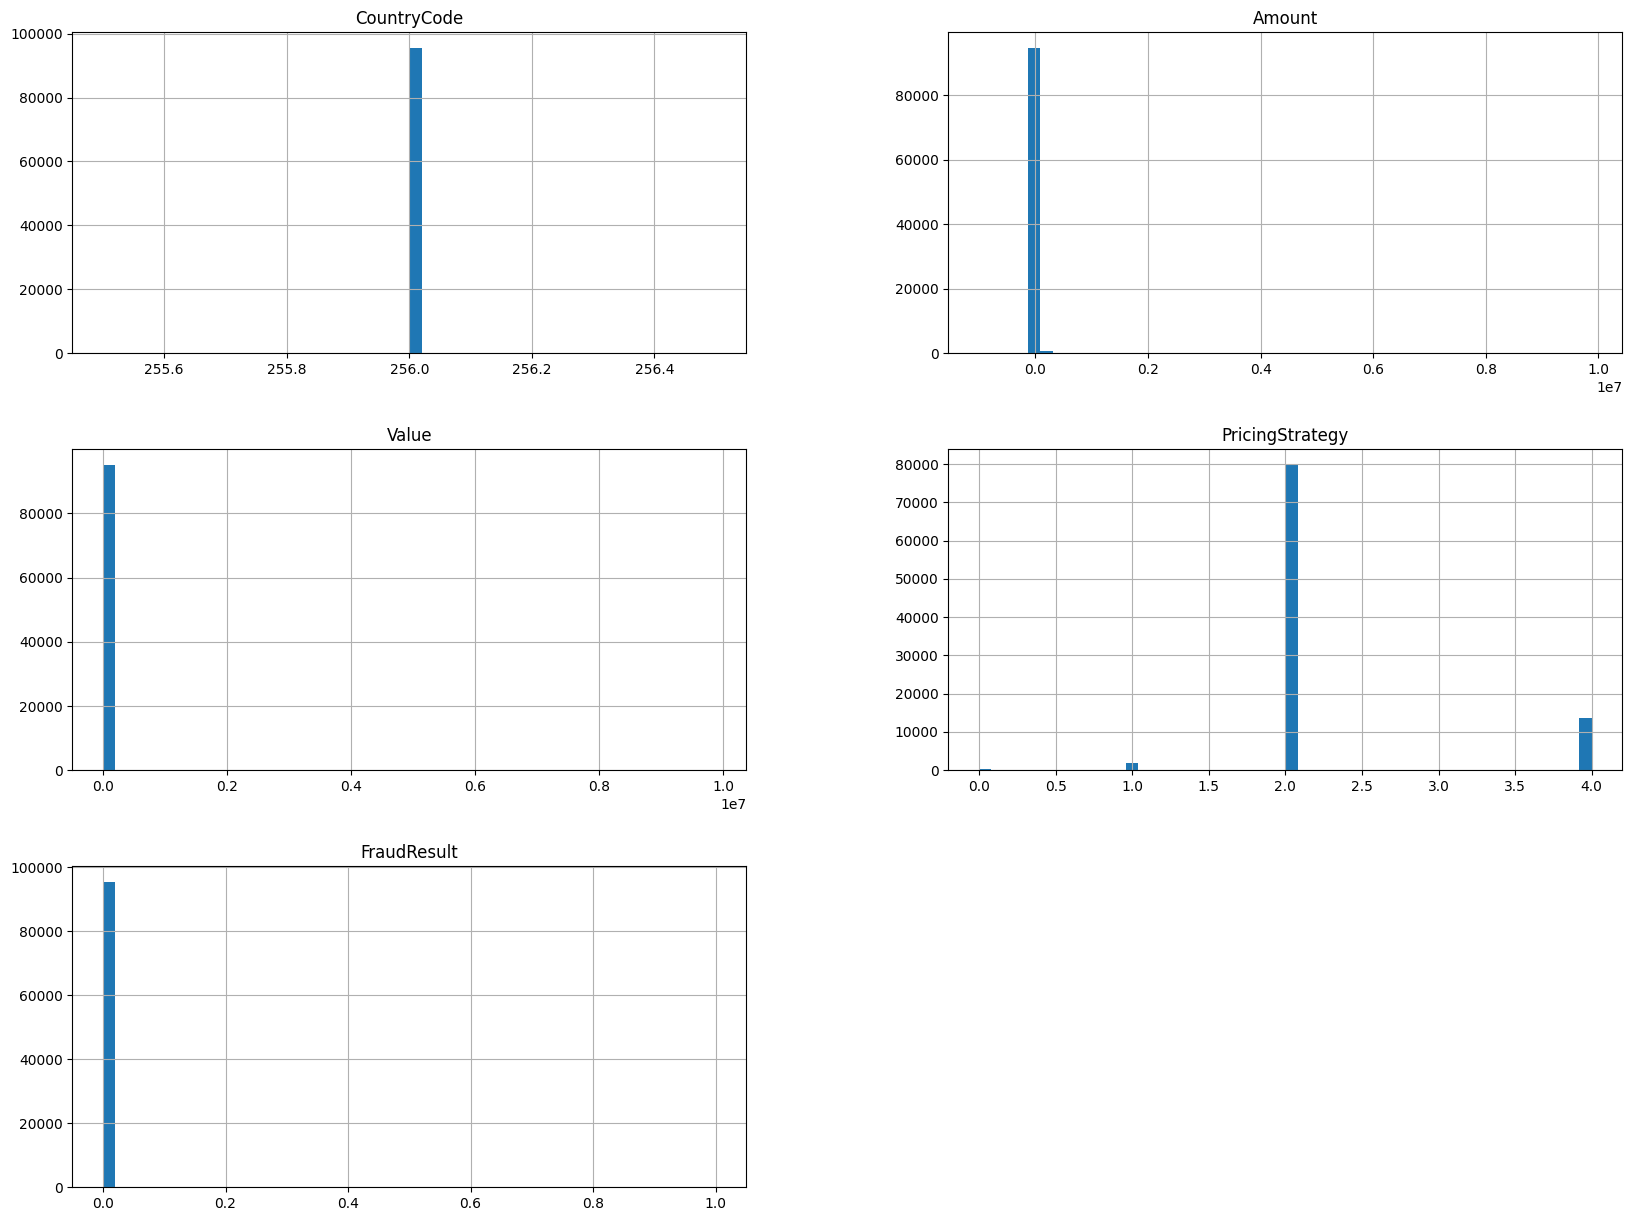

In [26]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## 5. Categorical Feature Distributions

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


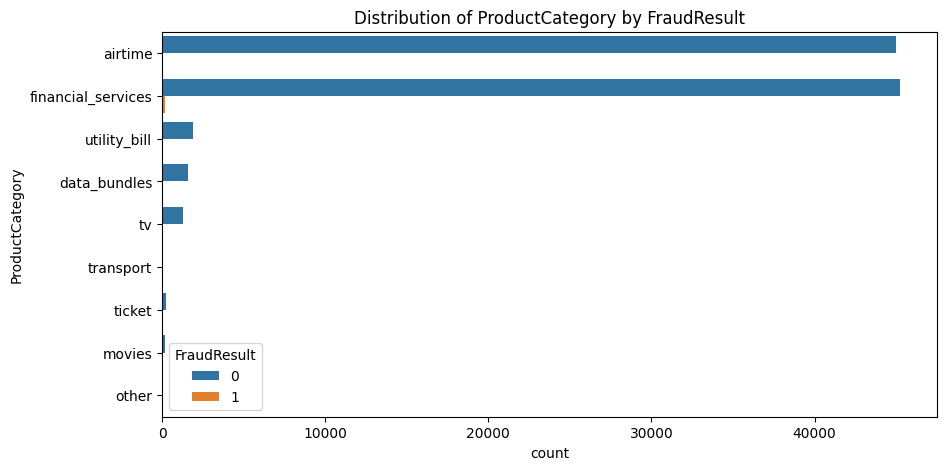

ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


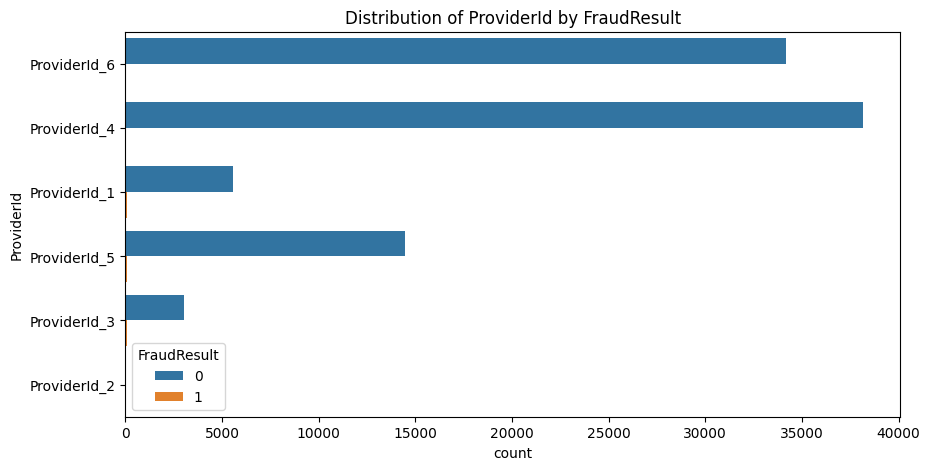

ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


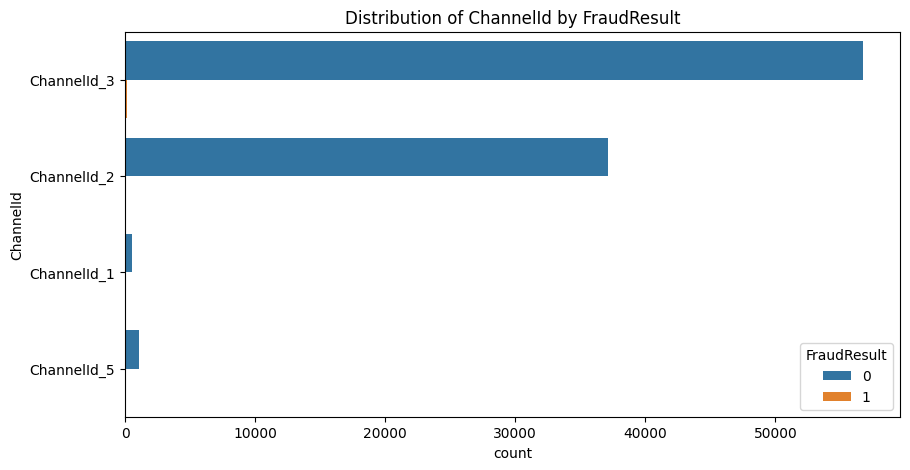

In [27]:
for col in ['ProductCategory', 'ProviderId', 'ChannelId']:
    print(df[col].value_counts())
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, hue='FraudResult')
    plt.title(f'Distribution of {col} by FraudResult')
    plt.show()

## 6. Correlation Analysis

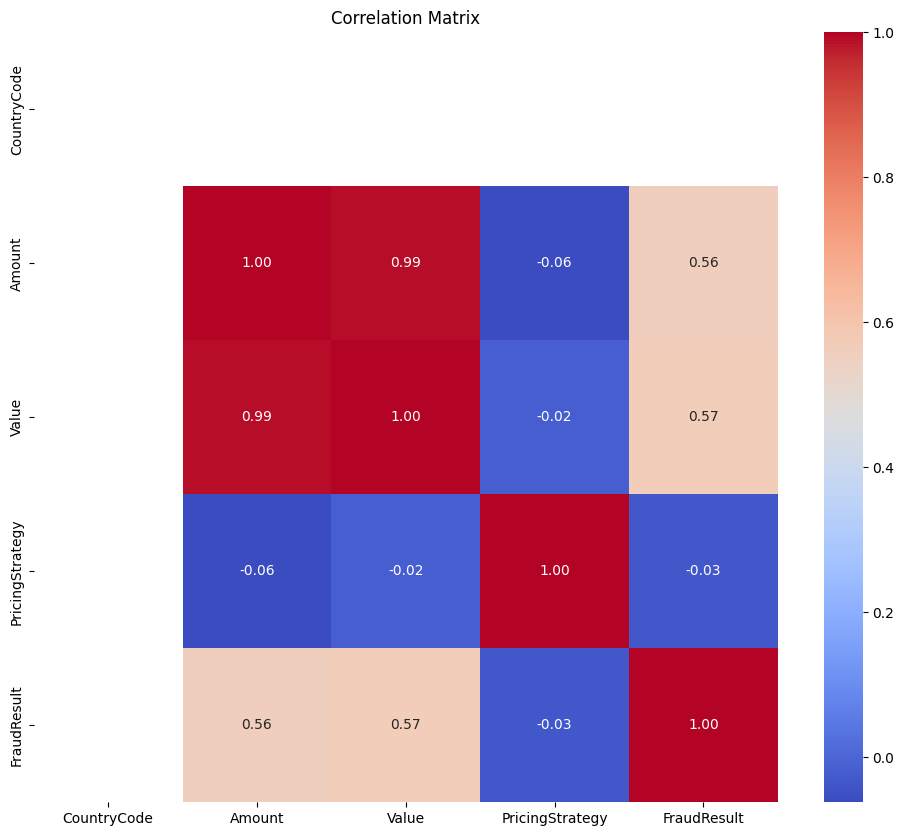

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 7. Missing Value Detection

In [29]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Target Variable Analysis

FraudResult
0    95469
1      193
Name: count, dtype: int64


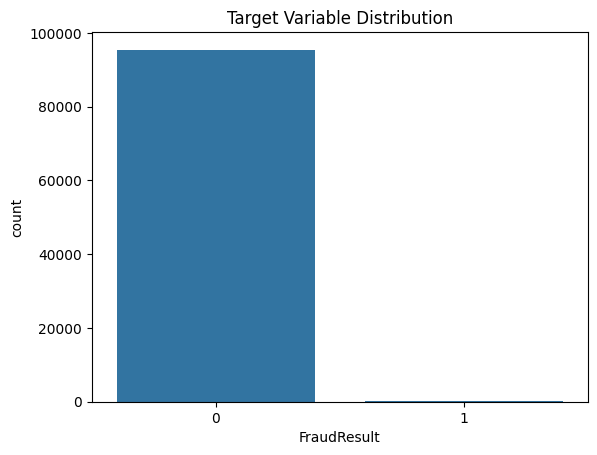

In [30]:
# Check class balance
print(df['FraudResult'].value_counts())
sns.countplot(x='FraudResult', data=df)
plt.title('Target Variable Distribution')
plt.show()

3. Feature-Target Relationships


Numerical Features vs Target

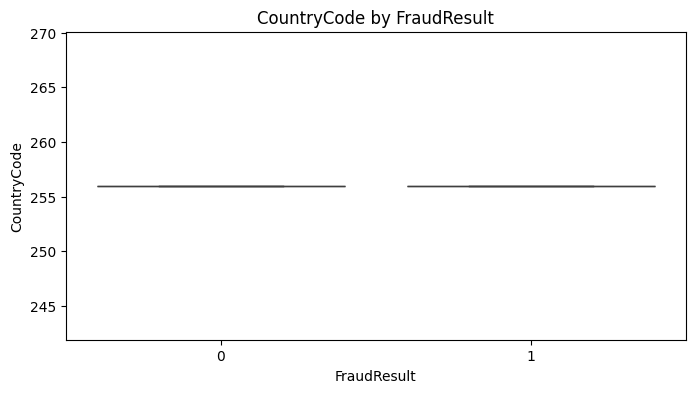

CountryCode: t-test p-value = nan


c:\Users\Cyber Defense\Desktop\week2\fintech-reviews-analytics\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


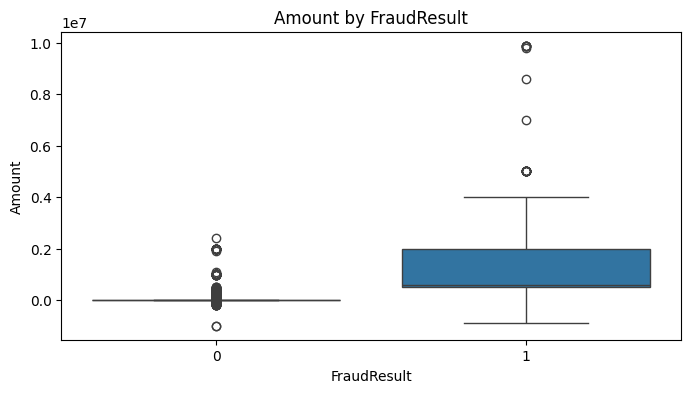

Amount: t-test p-value = 0.0000


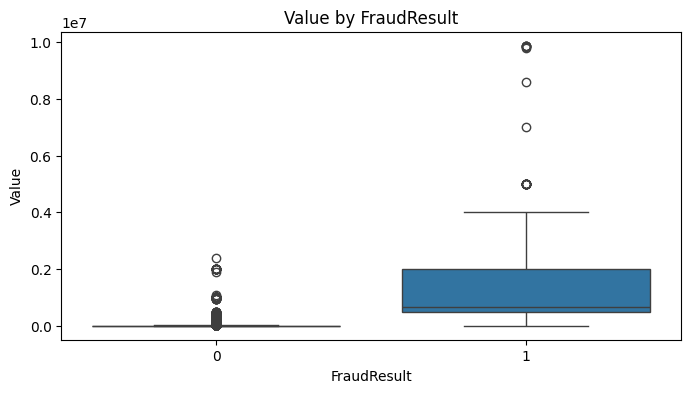

Value: t-test p-value = 0.0000


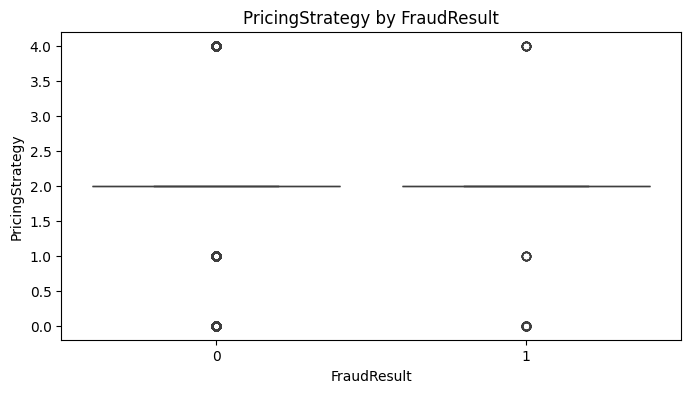

PricingStrategy: t-test p-value = 0.0000


In [31]:
import scipy.stats as stats

num_cols = df.select_dtypes(include=np.number).columns.drop('FraudResult', errors='ignore')
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='FraudResult', y=col, data=df)
    plt.title(f'{col} by FraudResult')
    plt.show()
    # Optional: Statistical test
    fraud_0 = df[df['FraudResult']==0][col].dropna()
    fraud_1 = df[df['FraudResult']==1][col].dropna()
    stat, p = stats.ttest_ind(fraud_0, fraud_1, equal_var=False)
    print(f"{col}: t-test p-value = {p:.4f}")

Categorical Features vs Target

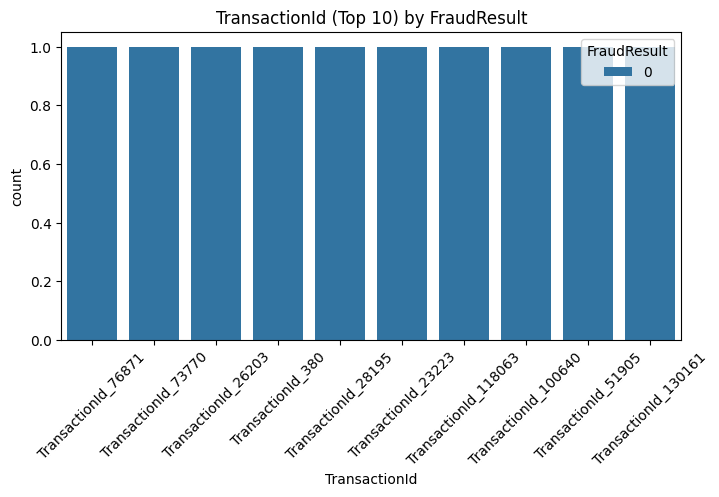

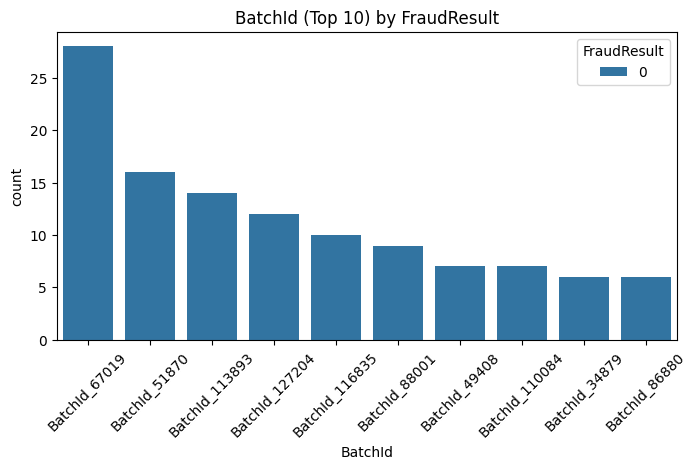

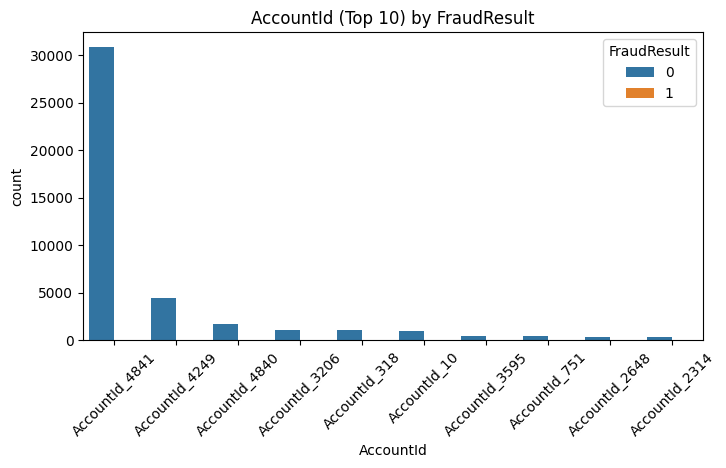

AccountId (top 10): chi2 p-value = 0.0027


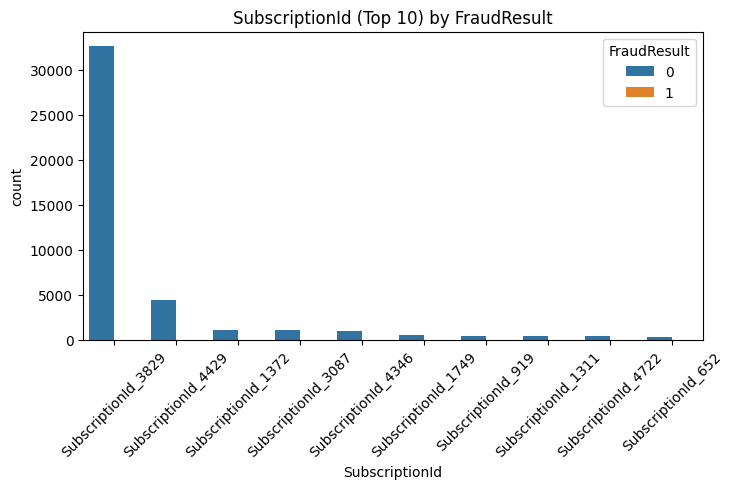

SubscriptionId (top 10): chi2 p-value = 0.0024


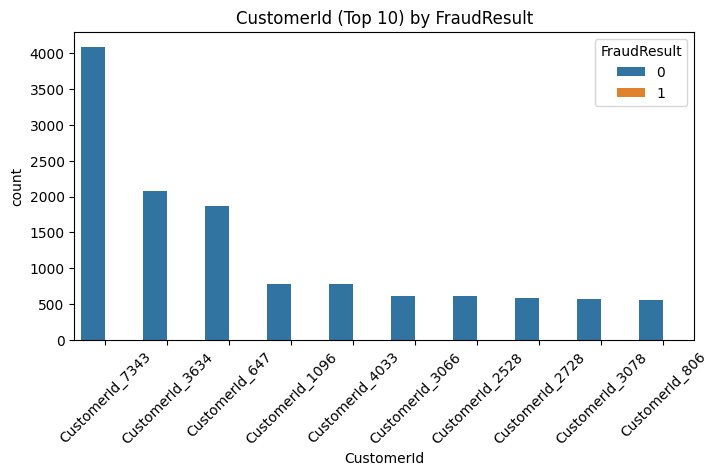

CustomerId (top 10): chi2 p-value = 0.0209


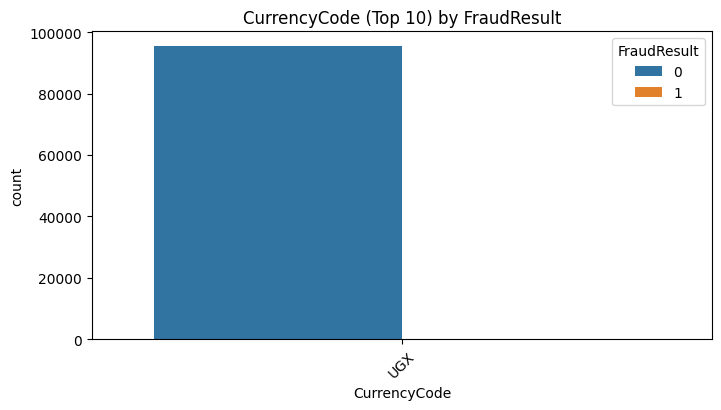

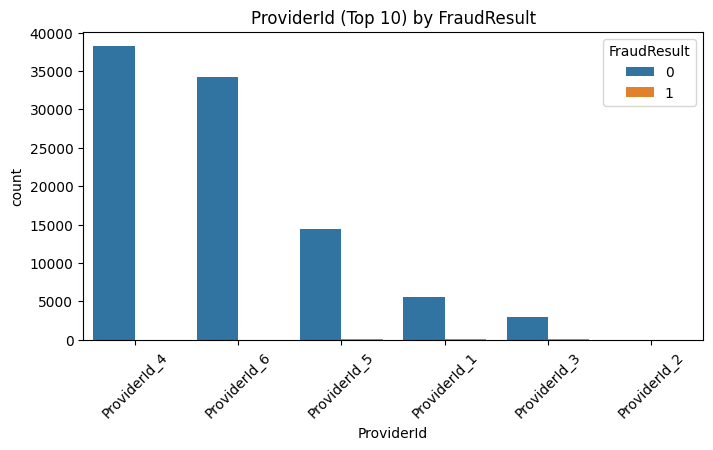

ProviderId (top 10): chi2 p-value = 0.0000


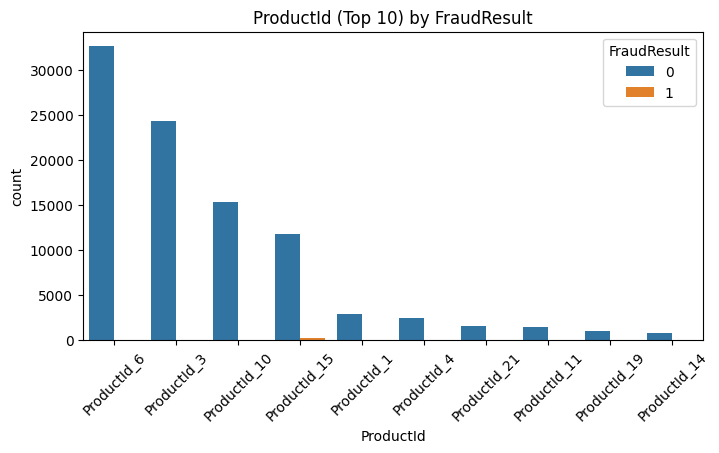

ProductId (top 10): chi2 p-value = 0.0000


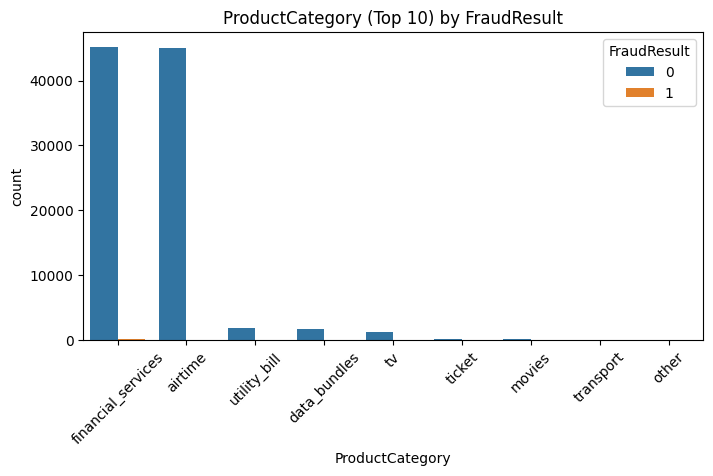

ProductCategory (top 10): chi2 p-value = 0.0000


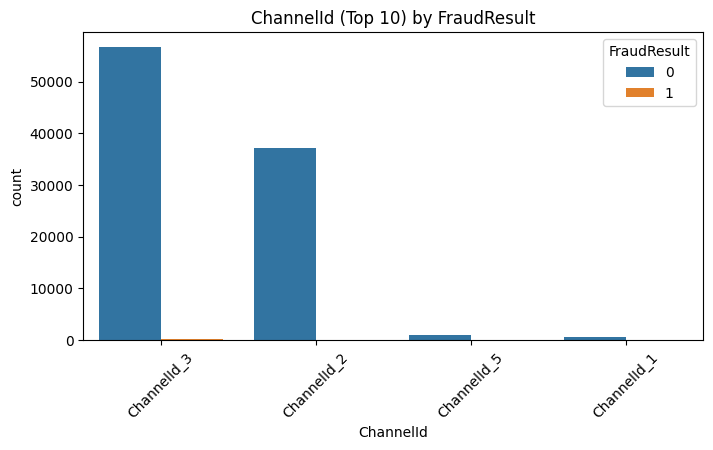

ChannelId (top 10): chi2 p-value = 0.0000


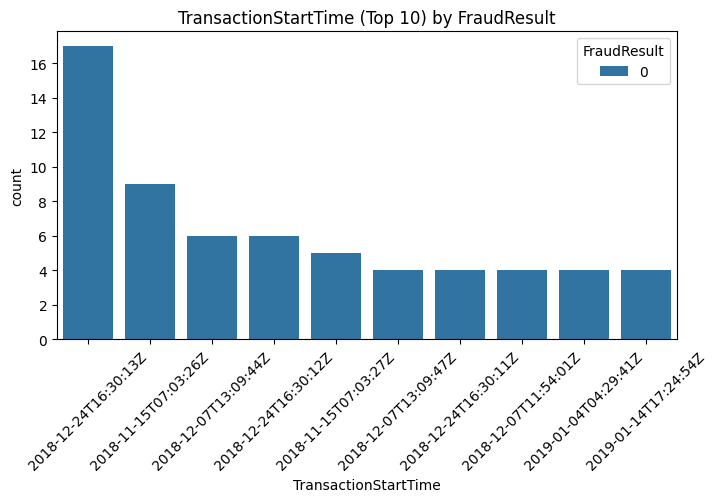

In [32]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    top_categories = df[col].value_counts().nlargest(10).index  # Top 10
    df_plot = df[df[col].isin(top_categories)]
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='FraudResult', data=df_plot, order=top_categories)
    plt.title(f'{col} (Top 10) by FraudResult')
    plt.xticks(rotation=45)
    plt.show()
    # Optional: Chi-squared test on top categories only
    ct = pd.crosstab(df_plot[col], df_plot['FraudResult'])
    if ct.shape[0] > 1 and ct.shape[1] > 1:
        chi2, p, _, _ = stats.chi2_contingency(ct)
        print(f"{col} (top 10): chi2 p-value = {p:.4f}")

4. Correlation & Feature Importance

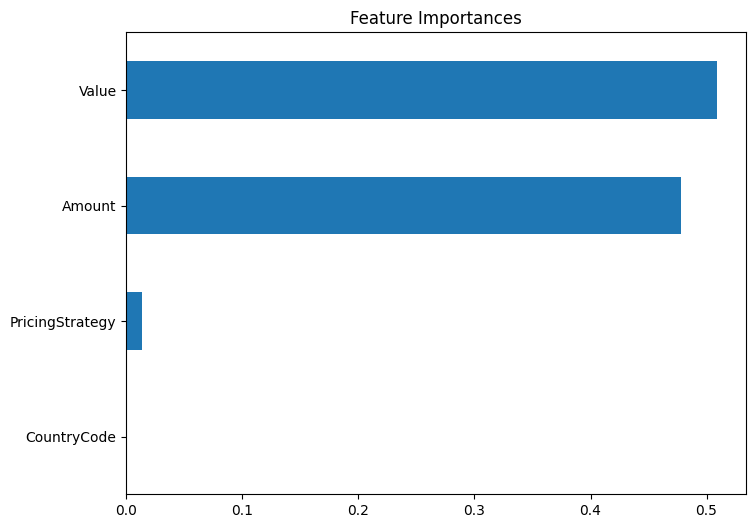

In [33]:


# Quick feature importance with RandomForest
from sklearn.ensemble import RandomForestClassifier

X = df.select_dtypes(include=[np.number]).drop('FraudResult', axis=1, errors='ignore')
y = df['FraudResult']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances')
plt.show()

## 8. Outlier Detection

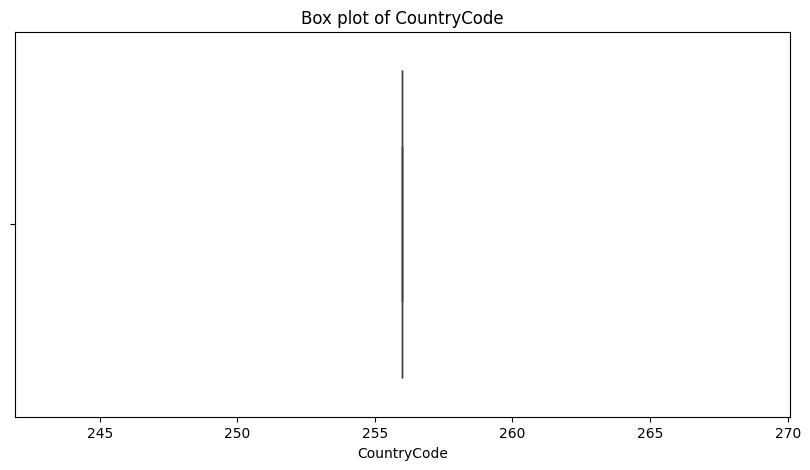

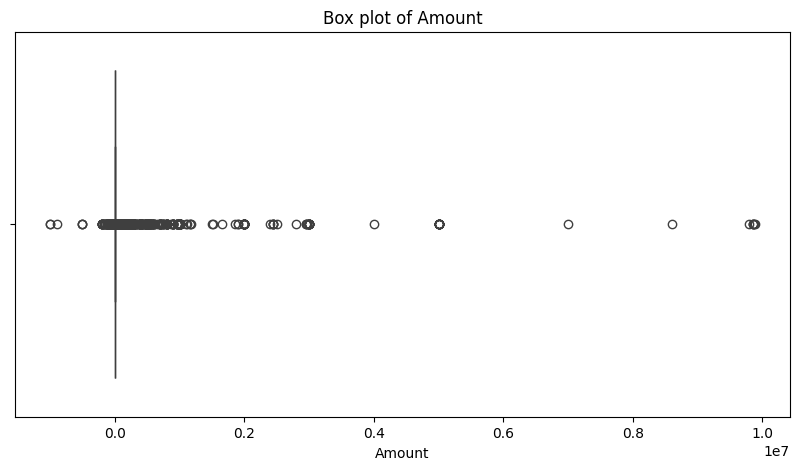

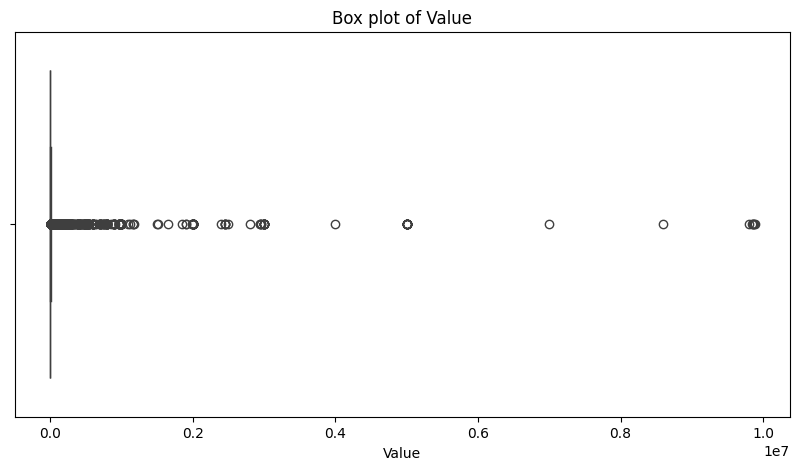

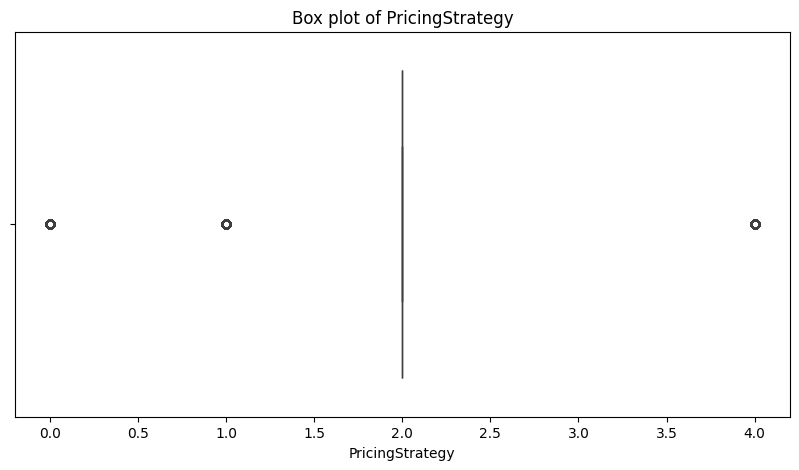

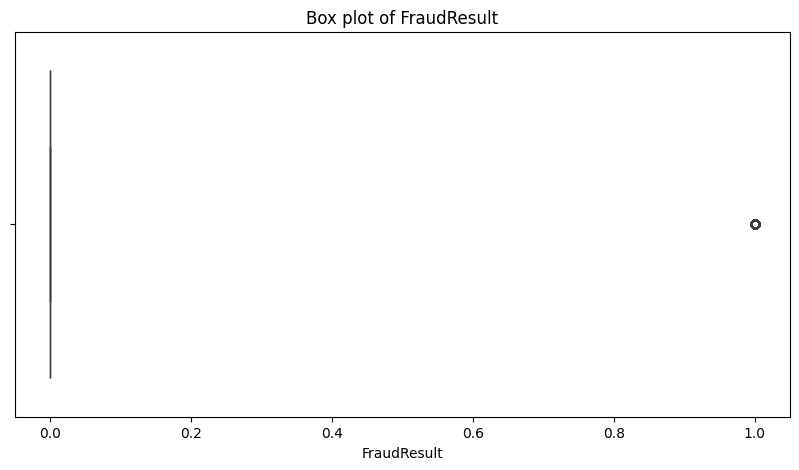

In [34]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()